#### YSA ile Kripto Para Fiyat Tahmini 
 Gelistirenler
+ 214210050 Furkan Demircan
+ 214210056 Eray Elagoz 
---------------------------------------------------------------------------

##### Objective
It aims to leverage machine learning & Deep Learning techniques to develop an accurate and reliable model for predicting and forecasting Bitcoin prices. By utilizing historical data and relevant features, the model provided insights into the potential future trends of Bitcoin, assisting investors, traders, and researchers in making informed decisions in the cryptocurrency market.

##### Libraries

In [ ]:
# Data manipulation and analysis
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import yfinance as yf # for coin data

# Main libraries
import datetime as dt # for date and time operations

# Machine learning
from sklearn.preprocessing import MinMaxScaler # for normalization
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error, recall_score, precision_score, confusion_matrix # for model evaluation
from sklearn.metrics import f1_score, accuracy_score, classification_report

# Deep learning
import tensorflow as tf # For neural networks
from tensorflow.keras.models import Sequential # For building the neural network
from tensorflow.keras.layers import Dense, Dropout, LSTM # For building neural networks
from tensorflow.keras.optimizers import Adam # For configuring the learning process
from tensorflow.keras.callbacks import TensorBoard # For visualizing learning

##### Fetching the Bitcoin Price Data

[*********************100%***********************]  1 of 1 completed

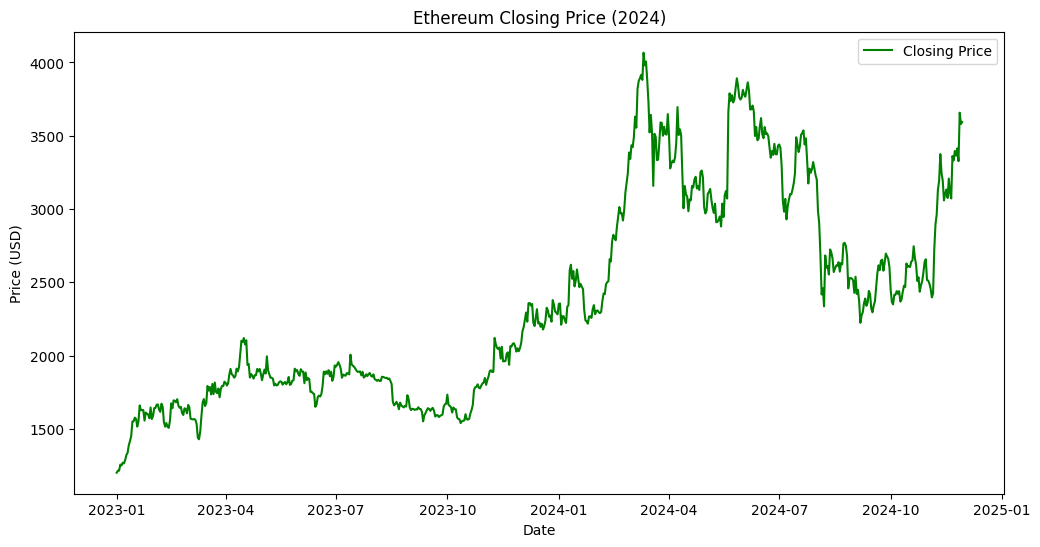

In [123]:
# Fetch Bitcoin data
df = yf.download("ETH-USD", start="2023-01-01", end="2024-11-30")

# Display the first few rows of the data
df.head()

# Plot the closing price to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label="Closing Price", color='green')
plt.title("Ethereum Closing Price (2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

##### Data Infos

In [126]:
print("=============================================")
print("Data types of the columns in the data frame:", df.dtypes) # Data types of the columns
print("=============================================")
print("Shape of the data frame:", df.shape) # Shape of the data frame
print("=============================================")
print("Lenght of the data:", len(df)) # Length of the data
print("=============================================")
df.describe()


Data types of the columns in the data frame: Price      Ticker 
Adj Close  ETH-USD    float64
Close      ETH-USD    float64
High       ETH-USD    float64
Low        ETH-USD    float64
Open       ETH-USD    float64
Volume     ETH-USD      int64
dtype: object
Shape of the data frame: (699, 6)
Lenght of the data: 699


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
count,699.000000,699.000000,699.000000,699.000000,699.000000,6.990000e+02
mean,2364.854938,2364.854938,2412.035784,2311.447229,2361.463078,1.229910e+10
std,703.822843,703.822843,725.257874,678.227062,703.622940,8.436459e+09
min,1200.964844,1200.964844,1203.475342,1192.885376,1196.713623,2.081626e+09
25%,1800.300476,1800.300476,1827.601135,1769.574402,1797.976562,6.652484e+09
50%,2231.465332,2231.465332,2276.764648,2180.225342,2226.892578,1.015547e+10
75%,2972.332275,2972.332275,3034.360229,2888.783813,2969.967041,1.535598e+10
max,4066.445068,4066.445068,4092.284180,3936.627197,4066.690430,6.766813e+10


##### Data PreProcessing

In [92]:
# Use only the 'Close' column for prediction
data = df[['Close']]

# Scale data between 0 and 1 for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

# Define prediction window size
prediction_days = 30  # Use the last 30 days to predict the next day

# Create training data
x_train, y_train = [], []

for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i - prediction_days:i, 0])
    y_train.append(scaled_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

##### Creating the Neural Network with LSTM

In [93]:
# Initialize the LSTM model
model = Sequential()

# Add layers
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))  # Prevent overfitting
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100))
model.add(Dropout(0.3))
model.add(Dense(units=1))  # Final output layer

# Compile the model     
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)


c:\Users\ErenElagz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0611
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0078
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0070
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0065
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0059
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0055
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0056
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0052
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0039
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0041
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0043
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0047
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0043
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0039
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0033
Epoc

##### Model Data

In [94]:
model.summary() # Display the model summary

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 30, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 30, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,105 (2.31 MB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 403,404 (1.54 MB)

##### Test Data

In [99]:
# Fetch the last 30 days of data for prediction
future_days = 60  # Number of days to predict

# Prepare test data
test_data = df[-(prediction_days + future_days):]  # Include a small recent dataset
test_scaled = scaler.transform(test_data['Close'].values.reshape(-1, 1))

# Create x_test and y_test
x_test = []
y_test = test_scaled[prediction_days:]  # Actual prices for evaluation

# Create x_test
for i in range(prediction_days, len(test_scaled)):
    x_test.append(test_scaled[i - prediction_days:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


##### Prediction Bitcoin Price

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


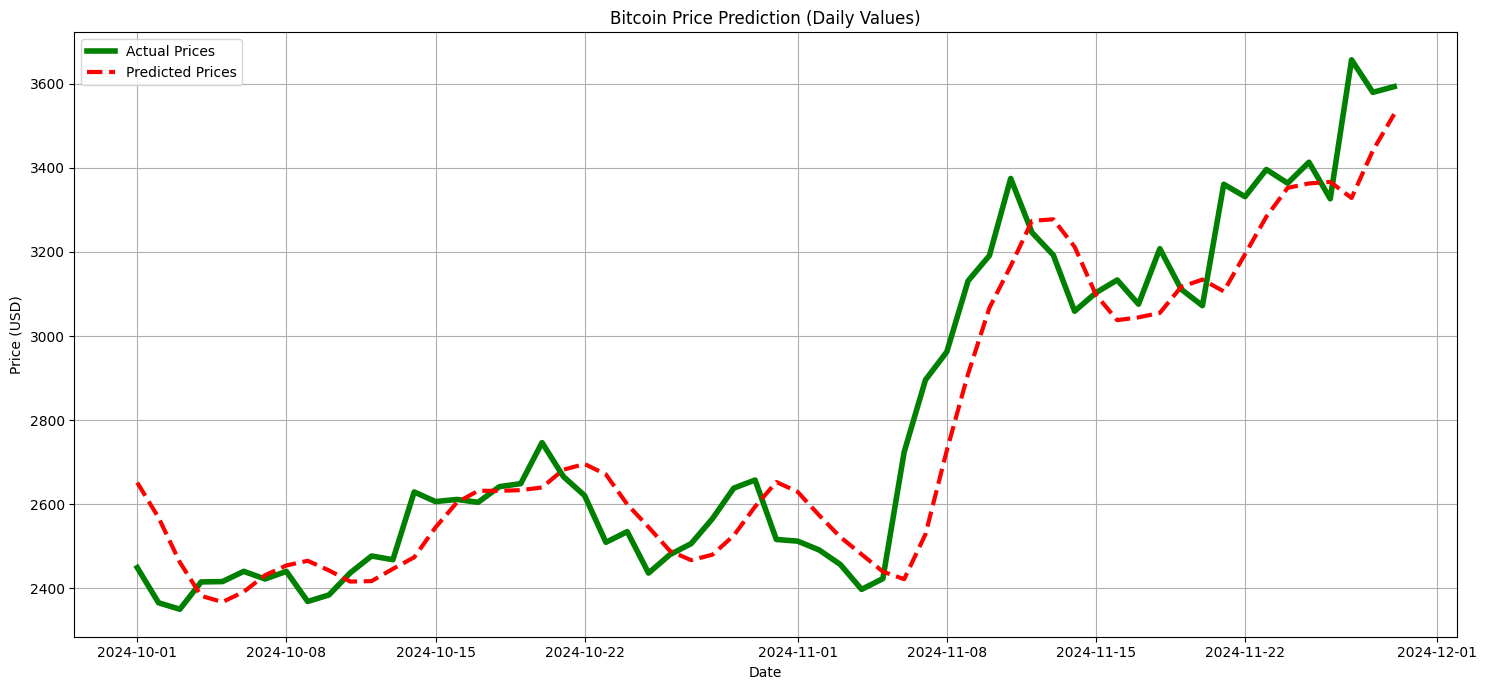

In [119]:
# Predict Bitcoin prices
predicted_scaled = model.predict(x_test)

# Inverse scale predictions to get actual price
predicted_prices = scaler.inverse_transform(predicted_scaled)

# Inverse scale y_test for comparison
actual_prices = scaler.inverse_transform(y_test)

# Generate a date range for x-axis
dates = df.index[-len(actual_prices):]

# Plot actual vs predicted prices with dates
plt.figure(figsize=(15, 7))
plt.plot(dates, actual_prices, label="Actual Prices", color="green", linewidth=4)
plt.plot(dates, predicted_prices, label="Predicted Prices", color="red", linestyle="--", linewidth=3)
plt.title("Bitcoin Price Prediction (Daily Values)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Evaulating the Model

In [116]:
# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

# Convert actual and predicted prices to binary labels (1 for increase, 0 for decrease)
actual_labels = (actual_prices[1:] > actual_prices[:-1]).astype(int)
predicted_labels = (predicted_prices[1:] > predicted_prices[:-1]).astype(int)

# Calculate accuracy and F1-score
accuracy = accuracy_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

# Print the classification report
print(f"=============================================")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1-Score: {f1:.2f}")
# Detailed classification report
print(f"=============================================")
print(classification_report(actual_labels, predicted_labels))
# Print the error metrics
print(f"=============================================")
print(f"Ortalama Kare Hatası: ")
print(f"Mean Squared Error: {mse:.2f}") # Mean Squared Error
print(f"=============================================")
print(f"Ortalama Gunluk Sapma Miktari $ Cinsinden: ")
print(f"Mean Absolute Error: {mae:.2f}") # Mean Absolute Error
print(f"=============================================")
print(f"Kök Ortalama Kare Hata: ")
print(f"Root Mean Squared Error: {rmse:.2f}") # Root Mean Squared Error
print(f"RMSE: Tahmin edilen değerlerin gerçek değerlere olan ortalama uzaklığını, gerçek değişkenin biriminde verir. Örneğin: Eğer fiyatlar dolar cinsindeyse, RMSE’nin sonucu da dolar cinsinden olacaktır.")
print(f"=============================================")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%") # Mean Absolute Percentage Error
print(f"-!- A MAPE below 10-20% is generally considered good for financial predictions.")
print(f"=============================================")
print(f"Aykırı Değerlere Duyarlılık: Büyük hatalar MSE üzerinde çok büyük bir etkiye sahiptir. Çözüm: Aykırı değerlere daha az duyarlı bir metrik olan MAE (Mean Absolute Error) kullanabilirsiniz.")

Accuracy: 47.46%
F1-Score: 0.55
              precision    recall  f1-score   support

           0       0.39      0.35      0.37        26
           1       0.53      0.58      0.55        33

    accuracy                           0.47        59
   macro avg       0.46      0.46      0.46        59
weighted avg       0.47      0.47      0.47        59

Ortalama Kare Hatası: 
Mean Squared Error: 16224.73
Ortalama Gunluk Sapma Miktari $ Cinsinden: 
Mean Absolute Error: 96.13
Kök Ortalama Kare Hata: 
Root Mean Squared Error: 127.38
RMSE: Tahmin edilen değerlerin gerçek değerlere olan ortalama uzaklığını, gerçek değişkenin biriminde verir. Örneğin: Eğer fiyatlar dolar cinsindeyse, RMSE’nin sonucu da dolar cinsinden olacaktır.
Mean Absolute Percentage Error (MAPE): 3.39%
-!- A MAPE below 10-20% is generally considered good for financial predictions.
Aykırı Değerlere Duyarlılık: Büyük hatalar MSE üzerinde çok büyük bir etkiye sahiptir. Çözüm: Aykırı değerlere daha az duyarlı bir metrik o

##### Comparing the Train and Test Scores

In [117]:
# Eğitim ve test hatalarını karşılaştırın
train_loss = history.history['loss'][-1]  # Son epoch'taki eğitim kaybı
test_loss = model.evaluate(x_test, y_test)

# Eğitim ve test hatalarını yazdırın
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0014    
Train Loss: 0.0021292855963110924
Test Loss: 0.001718329032883048
